In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
matplotlib.use('TkAgg')

## This is the function to find point of intersection of two lines based on crammer's rule

In [47]:
#Function to find the point of intersection of two lines
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) 

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       print ("Parallel Lines")

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [48]:
#Function to find the vanishing points
def plot_vanishing_line():
    print ("Number of lines = 4")
    print('')
    n_lines = 4
    n_points = n_lines*2
    points = plt.ginput(n_points)
    print ("Points to find the vanishing points")
    print('')
    print(points)
    # Find intersection points
    vanishing_points = []
    print (range(len(points)))
    for i in range(0, len(points), n_lines):
        A1 = points[i]
        A2 = points[i+1]
        B1 = points[i+2]
        B2 = points[i+3]
        plt.plot([A1[0], A2[0]], [A1[1], A2[1]], marker = 'o')
        plt.plot([B1[0], B2[0]], [B1[1], B2[1]], marker = 'o')
        p11, p12 = line_intersection((A1, A2), (B1, B2))
        vanishing_points.append((p11, p12))
    
    # Plot the vanishing points
    plt.plot([vanishing_points[0][0], vanishing_points[1][0]], [vanishing_points[0][1], vanishing_points[1][1]], marker = 'o')
    
    # Find Equation
    m = (vanishing_points[1][1] - vanishing_points[0][1]) / (vanishing_points[1][0] - vanishing_points[0][0])
    c = vanishing_points[0][1] - m * vanishing_points[0][0]
    print ('\n')
    print ('Equation:')
    equation = 'y = ' + str(m) + '*x + ' + str(c)
    print ('Vanishing Line equation')
    return (vanishing_points)

In [49]:
#Reading input image
image = cv2.imread('img.jpg')

Pole Points :- [(1039.9388992980307, 2046.562797344086), (1039.9388992980307, 2197.3109603944154)]
Tractor Points :- [(1769.3654947028504, 2114.6426129152023), (1774.228338672216, 2328.607747567283)]
Building Points :- [(1030.2132113592997, 923.2458404206636), (1010.7618354818383, 1983.345825742335)]
Number of lines = 4

Points to find the vanishing points

[(242.4324883220943, 874.6174007270092), (631.4600058713318, 791.9490532477962), (125.72423305732309, 1044.8169396548005), (602.2829420551388, 971.8742801143185), (1676.9714592849073, 1088.5825353790897), (1842.3081542433324, 1103.171067287186), (1667.2457713461758, 1278.2334501843427), (1827.7196223352362, 1278.2334501843427)]
range(0, 8)


Equation:
Vanishing Line equation
Vanishing Points :- [(-2320.4741187082877, 1419.2350547209653), (3826.3484937444528, 1278.233450184342)]


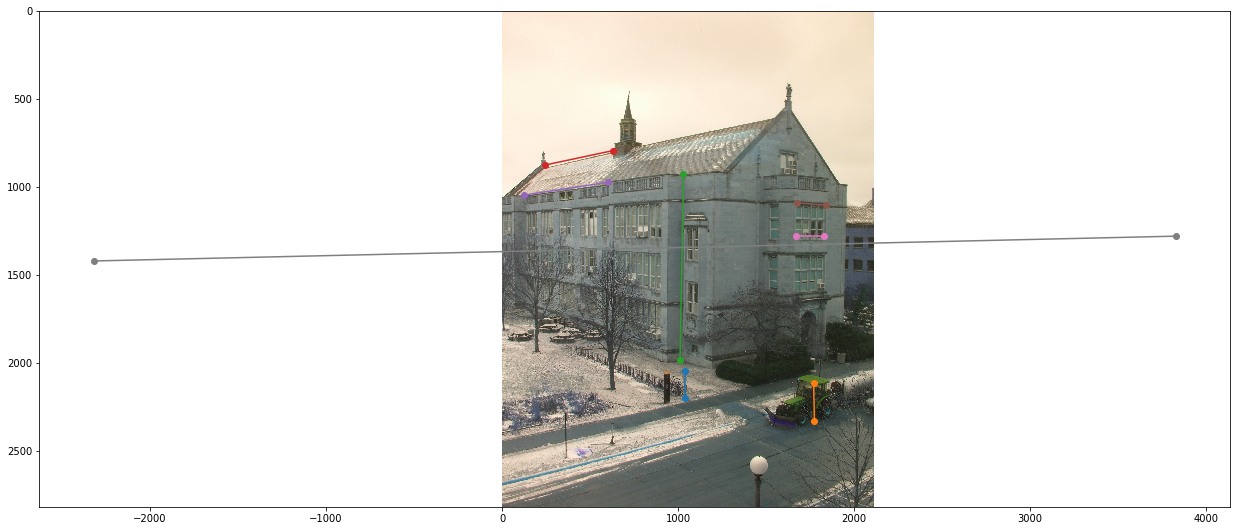

In [50]:
plt.imshow(image)
points = plt.ginput(2)
pole_top = points[0]
pole_bottom = points[1]
print ("Pole Points :-",points)
plt.plot([pole_top[0], pole_bottom[0]], [pole_top[1], pole_bottom[1]], marker = 'o')
points = plt.ginput(2)
object_top = points[0]
object_bottom = points[1]
print ("Tractor Points :-",points)
plt.plot([object_top[0], object_bottom[0]], [object_top[1], object_bottom[1]], marker = 'o')
points = plt.ginput(2)
build_top = points[0]
build_bottom = points[1]
print ("Building Points :-",points)
plt.plot([build_top[0], build_bottom[0]], [build_top[1], build_bottom[1]], marker = 'o')
vanishing_points = plot_vanishing_line()
print ("Vanishing Points :-",vanishing_points)


In [51]:
A1 = pole_bottom
A2 = object_bottom
B1 = vanishing_points[0]
B2 = vanishing_points[1]
point_on_vl = line_intersection((A1, A2), (B1, B2))
# plt.plot([object_bottom[0], point_on_vl[0]], [object_bottom[1], point_on_vl[1]], marker = 'o')
# plt.plot([object_top[0], point_on_vl[0]], [object_top[1], point_on_vl[1]], marker = 'o')
print (point_on_vl)

(-3198.838856096556, 1439.3838120788282)


In [52]:
A1 = object_top
A2 = object_bottom
B1 = pole_top
B2 = point_on_vl
height_object_point = line_intersection((A1, A2),(B1, B2))

In [53]:
pole_height = 1.65
height_of_object = pole_height * (np.linalg.norm(np.array(object_top)-np.array(object_bottom))*1.0/np.linalg.norm(np.array(height_object_point)-np.array(object_bottom)))
print ("%.2f" %height_of_object,'m')

1.99 m


In [54]:
A1 = pole_bottom
A2 = build_bottom
B1 = vanishing_points[0]
B2 = vanishing_points[1]
point_on_vl = line_intersection((A1, A2), (B1, B2))
# plt.plot([build_bottom[0], point_on_vl[0]], [build_bottom[1], point_on_vl[1]], marker = 'o')
# plt.plot([build_top[0], point_on_vl[0]], [build_top[1], point_on_vl[1]], marker = 'o')
print (point_on_vl)

(923.6897731814838, 1344.817368873072)


In [55]:
A1 = build_top
A2 = build_bottom
B1 = pole_top
B2 = point_on_vl
height_object_point = line_intersection((A1, A2),(B1, B2))

In [56]:
pole_height = 1.65
height_of_building = pole_height * (np.linalg.norm(np.array(build_top)-np.array(build_bottom))*1.0/np.linalg.norm(np.array(height_object_point)-np.array(build_bottom)))
print ("%.2f" %height_of_building,'m')

17.21 m


In [57]:
A1 = pole_bottom
A2 = pole_top
B1 = vanishing_points[0]
B2 = vanishing_points[1]
point_on_vl = line_intersection((A1, A2), (B1, B2))
height_of_camera = pole_height * (np.linalg.norm(np.array(point_on_vl)-np.array(pole_bottom))*1.0/np.linalg.norm(np.array(pole_top)-np.array(pole_bottom)))
print ("%.2f" %height_of_camera,'m')


9.36 m
